Heatmap has been saved as 'disease_heatmap_no_numbers.tiff'
Seaborn version: 0.13.2
Matplotlib version: 3.9.2


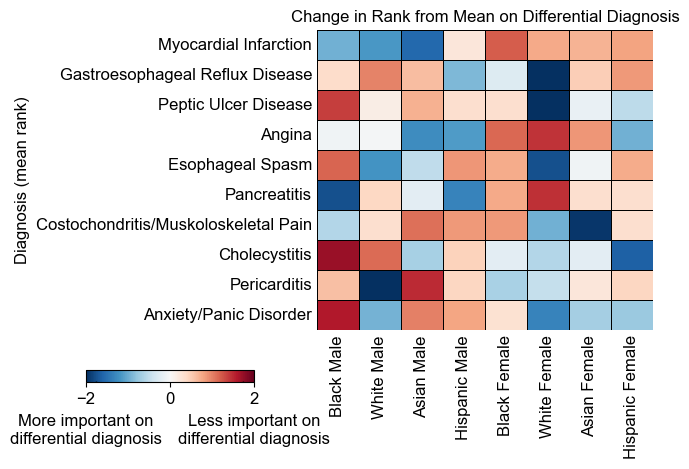

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Importing pyplot from matplotlib
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker
import matplotlib  # Importing matplotlib to access its version

# Set the global font to sans-serif condensed
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Sample data with 10 diseases
data = {
   'Myocardial Infarction': [-0.092783505, -0.1121892055, -0.1510006065, 0.0236506975, 0.1158277745, 0.0721649485, 0.0673135235, 0.0770163735],
   'Gastroesophageal Reflux Disease': [0.015873016, 0.043478261, 0.026915114, -0.039337474, -0.011732229, -0.094547964, 0.021394065, 0.037957212],
   'Peptic Ulcer Disease': [0.0800552105, 0.0082815735, 0.0414078675, 0.0193236715, 0.0193236715, -0.1297446515, -0.0082815735, -0.0303657695],
   'Angina': [-0.009096422, -0.004244997, -0.14008490, -0.1255306245, 0.126743481, 0.1607034565, 0.0976349305, -0.106124924],
   'Esophageal Spasm': [0.0536429145, -0.0552441955, -0.023218575, 0.040832666, 0.034427542, -0.080864692, -0.0040032025, 0.034427542],
   'Pancreatitis': [-0.138716356, 0.032436163, -0.017253278, -0.105590062, 0.060041408, 0.115251898, 0.026915114, 0.026915114],
   'Costochondritis/Muskoloskeletal Pain': [-0.0488390715, 0.028022418, 0.092073659, 0.0728582865, 0.0728582865, -0.080864692, -0.164131305, 0.028022418],
   'Cholecystitis': [0.127674258, 0.083505866, -0.04899931, 0.033816425, -0.015873016, -0.043478261, -0.015873016, -0.120772947],
   'Pericarditis': [0.025738799, -0.0886558625, 0.0638703525, 0.018112488, -0.0276453765, -0.020019066, 0.0104861775, 0.018112488],
   'Anxiety/Panic Disorder': [0.1628709455, -0.0966183575, 0.1021394065, 0.0800552105, 0.0303657695, -0.1352657005, -0.0690131125, -0.0745341615]
}

index = ['Black Male', 'White Male', 'Asian Male', 'Hispanic Male',
         'Black Female', 'White Female', 'Asian Female', 'Hispanic Female']

# Create DataFrame
df = pd.DataFrame(data, index=index)

# Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Transpose the DataFrame to switch x and y axes
df_scaled_transposed = df_scaled.T

# Set up the matplotlib figure
fig = plt.figure(figsize=(4.2, 4))
ax = fig.add_subplot(111)

# Create the heatmap without annotations (no numbers in the cells)
heatmap = sns.heatmap(df_scaled_transposed,
            cmap="RdBu_r",
            vmin=-2,
            vmax=2,
            center=0,
            annot=False,  # No annotations (no numbers in the cells)
            cbar=False,
            linewidths=0.5,
            linecolor='black',
            square=False,
            edgecolor='black',  # Add this line
            edgecolors='black')  # And this line

# Customize the plot
plt.title("Change in Rank from Mean on Differential Diagnosis", fontsize=12)
plt.ylabel("Diagnosis (mean rank)", fontsize=12)

# Remove both major and minor ticks
ax.tick_params(axis='both', which='both', length=0)

# Rotate x-axis labels to vertical and set font size
plt.xticks(rotation=90, ha='center', fontsize=12)
plt.yticks(fontsize=12)

# Adjust bottom margin to accommodate vertical labels
plt.subplots_adjust(bottom=0.2)

# Create a separate axes for the colorbar (move it farther down)
cax = fig.add_axes([-.4, .07, 0.4, 0.03])  # Adjusted bottom value from 0.05 to 0.01

# Add the colorbar to the new axes
cbar = fig.colorbar(heatmap.get_children()[0], cax=cax, orientation="horizontal")

# Add arrows and labels to the colorbar (made larger)
cax.text(-2, -4, "More important on\ndifferential diagnosis", ha='center', va='center', fontsize=12)
cax.text(2, -4, "Less important on\ndifferential diagnosis", ha='center', va='center', fontsize=12)
cax.arrow(-1.75, -0.75, 0, 0.6, head_width=0.07, head_length=0.15, fc='k', ec='k')
cax.arrow(1.75, -0.75, 0, 0.6, head_width=0.07, head_length=0.15, fc='k', ec='k')

# Adjust the main subplot
plt.subplots_adjust(bottom=0.2, left=0.15, top=0.95, right=0.95)

# Save the plot as a TIFF file with LZW compression
plt.savefig('disease_heatmap_no_numbers.tiff', dpi=300, pil_kwargs={"compression": "tiff_lzw"})

print("Heatmap has been saved as 'disease_heatmap_no_numbers.tiff'")

# Print versions of seaborn and matplotlib
print(f"Seaborn version: {sns.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
